In [32]:
import pandas as pd
import os
import json
import scipy
from scipy import stats

path = "../New Data"
os.listdir(path)

['Feeling pain and pressure in chest_Reports_over_Districts.csv',
 'Not getting smell_Reports_over_Districts.csv',
 'Dry cough_Reports_over_Districts.csv',
 'Diabetes_Reports_over_Districts.csv',
 'Kidney problem_Reports_over_Districts.csv',
 'Fever_Reports_over_Districts.csv',
 'Sore throat_Reports_over_Districts.csv',
 'Difficulty in breathing_Reports_over_Districts.csv',
 'High blood pressure_Reports_over_Districts.csv',
 'High fever_Reports_over_Districts.csv',
 'Weakness_Reports_over_Districts.csv',
 'Itching eyes or turning red_Reports_over_Districts.csv',
 'Sleepiness_Reports_over_Districts.csv',
 'Respiratory illness_Reports_over_Districts.csv',
 'Feeling testless_Reports_over_Districts.csv',
 'Muscle pain_Reports_over_Districts.csv',
 'Abdominal pain, nausea or thin closet_Reports_over_Districts.csv',
 'Cancer_Reports_over_Districts.csv',
 'Heart diseases_Reports_over_Districts.csv']

In [2]:
df = pd.read_csv(path + "/High fever_Reports_over_Districts.csv")
print(df.shape)
df.head()

(358, 66)


,date,Sunamganj,Comilla,Manikganj,Kishoreganj,Kushtia,Sirajganj,Jhenaidah,Rangamati,Chittagong,...,Madaripur,Bogra,Brahmanbaria,Barguna,Barisal,Bhola,Jessore,Gaibandha,Lalmonirhat,Panchagarh
0,2020-04-03,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
1,2020-04-04,1,0,0,2,0,2,0,0,7,...,0,0,0,0,1,0,2,0,0,0
2,2020-04-05,0,1,1,1,0,0,0,0,4,...,2,0,2,0,0,0,1,0,0,0
3,2020-04-06,3,4,0,0,0,1,3,0,4,...,0,0,0,1,2,1,0,0,0,0
4,2020-04-07,0,0,1,0,0,3,1,0,4,...,1,0,0,0,2,0,1,0,0,0


In [3]:
district_arr = df.keys()[1:]
district_arr = list(district_arr)
district_arr

['Sunamganj',
 'Comilla',
 'Manikganj',
 'Kishoreganj',
 'Kushtia',
 'Sirajganj',
 'Jhenaidah',
 'Rangamati',
 'Chittagong',
 'Nilphamari',
 'Thakurgaon',
 'Pabna',
 'Rajshahi',
 "Cox's Bazar",
 'Sylhet',
 'Tangail',
 'Chapainawabganj',
 'Magura',
 'Bagerhat',
 'Munshiganj',
 'Feni',
 'Maulvibazar',
 'Chuadanga',
 'Kurigram',
 'Netrokona',
 'Meherpur',
 'Narsingdi',
 'Pirojpur',
 'Gopalganj',
 'Mymensingh',
 'Khulna',
 'Jhalokati',
 'Narayanganj',
 'Lakshmipur',
 'Khagrachhari',
 'Noakhali',
 'Jamalpur',
 'Unknown',
 'Chandpur',
 'Patuakhali',
 'Narail',
 'Jaipurhat',
 'Gazipur',
 'Natore',
 'Sherpur',
 'Rajbari',
 'Habiganj',
 'Dhaka',
 'Naogaon',
 'Satkhira',
 'Faridpur',
 'Dinajpur',
 'Shariatpur',
 'Bandarban',
 'Rangpur',
 'Madaripur',
 'Bogra',
 'Brahmanbaria',
 'Barguna',
 'Barisal',
 'Bhola',
 'Jessore',
 'Gaibandha',
 'Lalmonirhat',
 'Panchagarh']

In [18]:
def getMonthTrackfromDF__districtwise(df):
    dist_track = {}
    month_track = []
    for district in district_arr:
        if(district not in dist_track):
            dist_track[district] = {}

    for index,row in df.iterrows():
        date = row['date']
        month = date[:7]
        if(month not in month_track):
            month_track.append(month)
            for district in dist_track:
                dist_track[district][month] = 0

        for district in district_arr:
            if(district not in row):
                continue
            dist_track[district][month] += row[district]
        
    return dist_track

In [19]:
dhaka = getMonthTrackfromDF__districtwise(df)['Dhaka']
dhaka

{'2020-04': 100,
 '2020-05': 42,
 '2020-06': 68,
 '2020-07': 21,
 '2020-08': 11,
 '2020-09': 4,
 '2020-10': 6,
 '2020-11': 3,
 '2020-12': 4,
 '2021-01': 3,
 '2021-02': 0,
 '2021-04': 10,
 '2021-05': 5,
 '2021-06': 1}

In [20]:
total_symptom_data = {}
for district in district_arr:
    total_symptom_data[district] = {}
for month in dhaka:
    for district in district_arr:
        total_symptom_data[district][month] = 0

for csv in os.listdir(path):
    df = pd.read_csv(path + "/" + csv)
    month_track_districtwise = getMonthTrackfromDF__districtwise(df)
    for district in district_arr:
        for month in month_track_districtwise[district]:
            total_symptom_data[district][month] += month_track_districtwise[district][month]

total_symptom_data['Dhaka']

{'2020-04': 38148,
 '2020-05': 22158,
 '2020-06': 45455,
 '2020-07': 9281,
 '2020-08': 6540,
 '2020-09': 5457,
 '2020-10': 2865,
 '2020-11': 3411,
 '2020-12': 1786,
 '2021-01': 901,
 '2021-02': 142,
 '2021-04': 4871,
 '2021-05': 1288,
 '2021-06': 114}

In [89]:
def buildCorrelationMatrix(district_arr, limit = None):
    print(district_arr)
    district_values = {}
    for district in district_arr:
        district_values[district] = []
        for month in total_symptom_data[district]:
            district_values[district].append(total_symptom_data[district][month])
            if(month == limit):
                break
    # print(district_values)
    corr_matrix = {}
    for district_1 in district_values:
        corr_matrix[district_1] = {}
        for district_2 in district_values:
            corr_matrix[district_1][district_2] = stats.pearsonr(district_values[district_1], district_values[district_2])[0]
            if(district_1 == district_2):
                break
    return corr_matrix

In [85]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
def plotMatrix(dct2D):
    # print(dct2D)
    arr2D = []
    for ik in dct2D:
        arr1D = []
        for jk in dct2D[ik]:
            arr1D.append(round(dct2D[ik][jk], 3))
        arr2D.append(arr1D)
    df_cm = pd.DataFrame(arr2D, index = list(dct2D.keys()),
                  columns = list(dct2D.keys()))
    plt.figure(figsize = (20,15))
    sn.heatmap(
        df_cm, annot=True, 
        cmap= sn.cm.rocket_r
        # cmap = "Blues"
    )
    plt.show()

In [92]:
district_arr_dhk = ['Dhaka', 'Narayanganj', 'Narsingdi', 'Gazipur', 'Tangail', 'Gopalganj', 'Manikganj', 'Kishoreganj', 'Madaripur', 'Faridpur', 'Shariatpur', 'Munshiganj', 'Rajbari']
corr_matrix = buildCorrelationMatrix(district_arr_dhk, limit = '2020-7')
corr_df = pd.DataFrame(corr_matrix)
corr_df

['Dhaka', 'Narayanganj', 'Narsingdi', 'Gazipur', 'Tangail', 'Gopalganj', 'Manikganj', 'Kishoreganj', 'Madaripur', 'Faridpur', 'Shariatpur', 'Munshiganj', 'Rajbari']


,Dhaka,Narayanganj,Narsingdi,Gazipur,Tangail,Gopalganj,Manikganj,Kishoreganj,Madaripur,Faridpur,Shariatpur,Munshiganj,Rajbari
Dhaka,1.0,0.992774,0.979823,0.951678,0.951982,0.946233,0.954903,0.936122,0.935526,0.918029,0.916613,0.912543,0.881084
Narayanganj,NaN,1.000000,0.973850,0.932556,0.945203,0.930150,0.948032,0.924373,0.929554,0.892808,0.893619,0.894325,0.851722
Narsingdi,NaN,NaN,1.000000,0.987414,0.976334,0.986705,0.990964,0.981583,0.981028,0.967478,0.961577,0.971336,0.921528
Gazipur,NaN,NaN,NaN,1.000000,0.953744,0.990699,0.983865,0.979384,0.970832,0.981320,0.965866,0.987524,0.923090
Tangail,NaN,NaN,NaN,NaN,1.000000,0.977404,0.976149,0.987998,0.988718,0.972159,0.981464,0.959600,0.967467
Gopalganj,NaN,NaN,NaN,NaN,NaN,1.000000,0.988944,0.995185,0.988414,0.990725,0.984445,0.993315,0.951293
Manikganj,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.988956,0.988354,0.978108,0.968326,0.982393,0.929965
Kishoreganj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.995917,0.992137,0.990162,0.989666,0.962312
Madaripur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.983072,0.984223,0.983627,0.957159
Faridpur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.993178,0.992132,0.972146


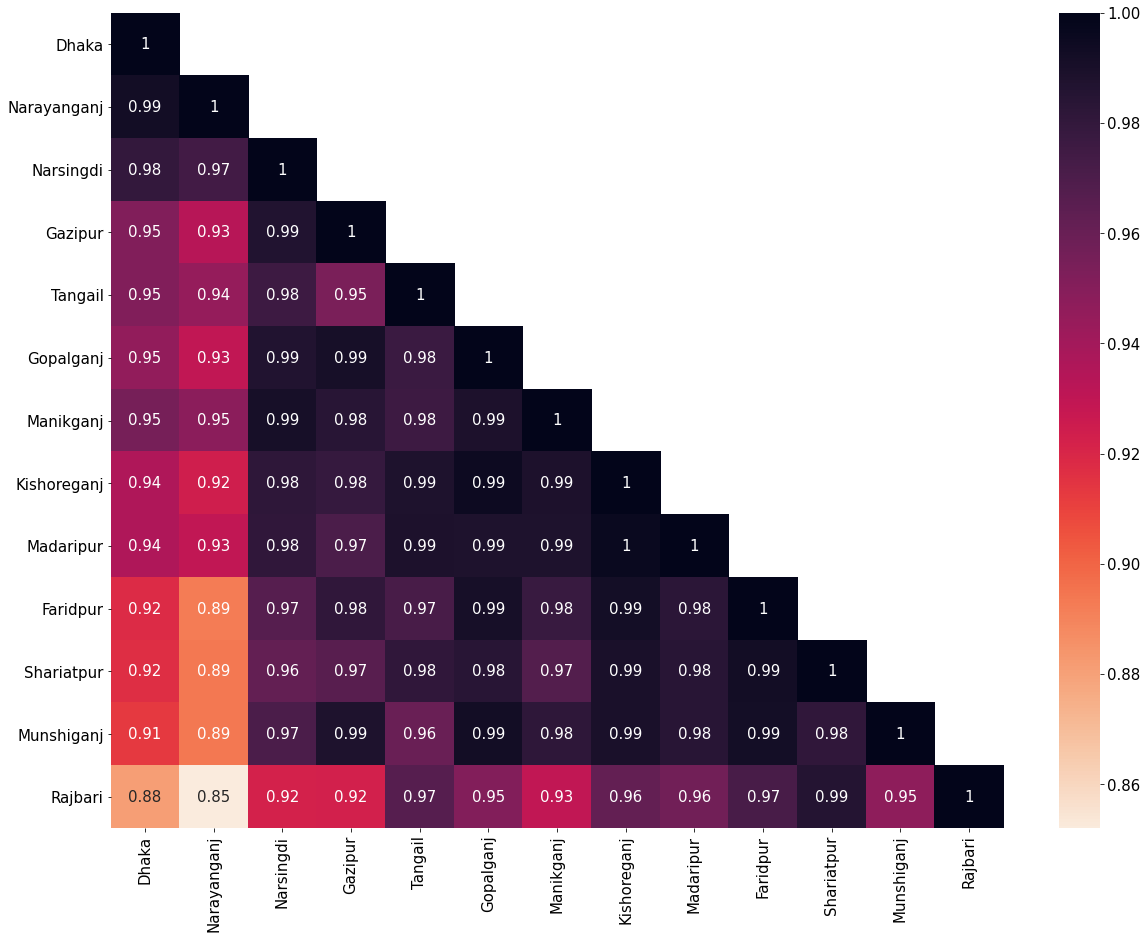

In [93]:
plt.rcParams.update({'font.size': 15})
plotMatrix(corr_matrix)

In [76]:
district_arr_ctg = ['Chittagong', 'Chandpur', 'Comilla', 'Cox\'s Bazar', 'Feni', 'Rangamati', 'Noakhali', 'Brahmanbaria', 'Lakshmipur', 'Bandarban', 'Khagrachhari']
corr_matrix = buildCorrelationMatrix(district_arr_ctg)
corr_df = pd.DataFrame(corr_matrix)
corr_df

['Chittagong', 'Chandpur', 'Comilla', "Cox's Bazar", 'Feni', 'Rangamati', 'Noakhali', 'Brahmanbaria', 'Lakshmipur', 'Bandarban', 'Khagrachhari']


,Chittagong,Chandpur,Comilla,Cox's Bazar,Feni,Rangamati,Noakhali,Brahmanbaria,Lakshmipur,Bandarban,Khagrachhari
Chittagong,1.0,0.994851,0.989766,0.989955,0.984973,0.960021,0.992418,0.987693,0.987532,0.971073,0.938746
Chandpur,NaN,1.000000,0.997331,0.996149,0.993920,0.963380,0.998578,0.996440,0.992351,0.978783,0.948538
Comilla,NaN,NaN,1.000000,0.992320,0.997863,0.975190,0.999127,0.998539,0.994379,0.984280,0.937951
Cox's Bazar,NaN,NaN,NaN,1.000000,0.987893,0.952822,0.992855,0.993086,0.987632,0.971431,0.951722
Feni,NaN,NaN,NaN,NaN,1.000000,0.983525,0.997640,0.998128,0.995691,0.991233,0.919819
Rangamati,NaN,NaN,NaN,NaN,NaN,1.000000,0.973258,0.976270,0.980424,0.986769,0.852856
Noakhali,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.998542,0.993689,0.983211,0.940219
Brahmanbaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.992063,0.982792,0.939311
Lakshmipur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.995154,0.905493
Bandarban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.867554


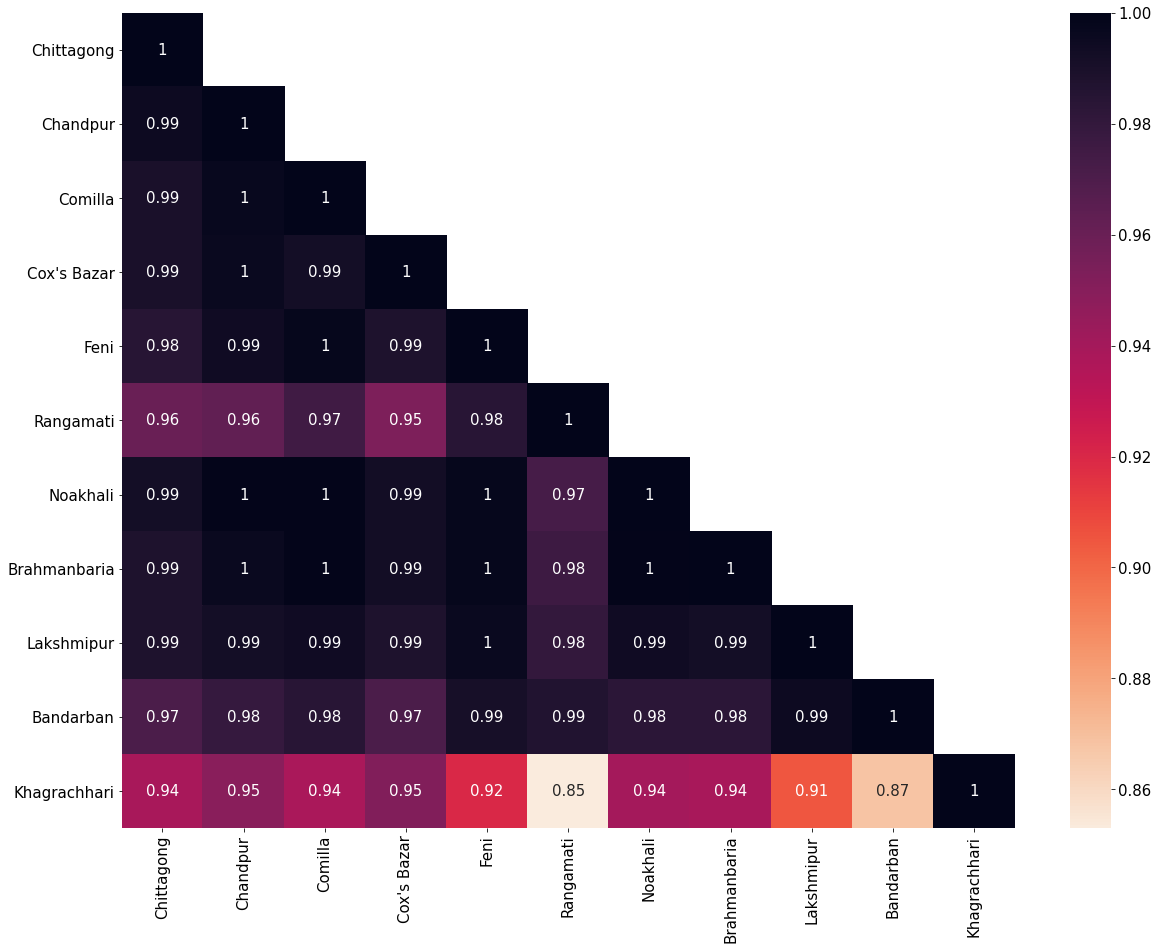

In [77]:
plt.rcParams.update({'font.size': 15})
plotMatrix(corr_matrix)